# TODO:对每一个类设置macro roc权重

In [1]:
import read_data
import set_hyper_paras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from roc import roc_curve,get_auc_score
from  sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
%matplotlib inline

In [2]:
X,y,X_test,y_test = read_data.trans_data(one_hot_key=True,standard_scaler=False,filename='./set.csv')
print(X.shape,X_test.shape)

(36040, 40) (2566, 40)


In [3]:
from sklearn.metrics import fbeta_score, make_scorer
fbeta_micro = make_scorer(fbeta_score, beta=2,average='micro')

## 使用随机搜索寻找并设置knn算法的超参数

0.9996399290937292
0.7116134060795012
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2254
           1       0.13      0.21      0.16       251
           2       0.04      0.13      0.06        45
           3       0.02      0.06      0.03        16

   micro avg       0.71      0.71      0.71      2566
   macro avg       0.27      0.30      0.27      2566
weighted avg       0.81      0.71      0.75      2566



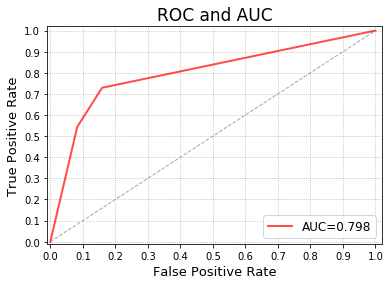

0.7980212997798621


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
param_distribs = {
        'n_neighbors': randint(low=1, high=20),
        'leaf_size': randint(low=15, high=60),
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
knn_clf = KNeighborsClassifier()
rnd_search_fb = RandomizedSearchCV(knn_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search_fb.fit(X,y)
set_hyper_paras.set_section('knn',rnd_search_fb.best_params_)
print(accuracy_score(rnd_search_fb.best_estimator_.predict(X),y))
print(accuracy_score(rnd_search_fb.best_estimator_.predict(X_test),y_test))

target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search_fb.best_estimator_.predict(X_test), target_names=target_names))

roc_curve(X_test,y_test,rnd_search_fb.best_estimator_,average = 'micro')
print(get_auc_score(X_test,y_test,rnd_search_fb.best_estimator_,average = 'micro'))

## 使用随机搜索寻找并设置AdaBoost算法的超参数

In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X,y)
print(accuracy_score(ada_clf.predict(X_test),y_test))
print(accuracy_score(ada_clf.predict(X),y))

0.7474668745128605
0.6628074451584312


0.6588466651894527
0.7396726422447389
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      2254
           1       0.18      0.37      0.25       251
           2       0.07      0.09      0.08        45
           3       0.10      0.25      0.14        16

   micro avg       0.74      0.74      0.74      2566
   macro avg       0.32      0.38      0.33      2566
weighted avg       0.83      0.74      0.78      2566



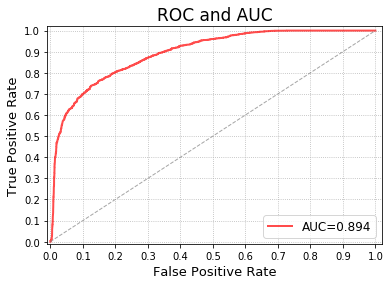

0.7117059262643899


In [35]:
import numpy as np
from scipy.stats import uniform
param_distribs = {
        'n_estimators': randint(low=10, high=80),
        'learning_rate': np.random.uniform( 0.1 , 1.5 , 100 ),
        'algorithm' : ['SAMME', 'SAMME.R']
    }
ada_clf = AdaBoostClassifier()
rnd_search = RandomizedSearchCV(ada_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring='accuracy', random_state=42,n_jobs=-1)
rnd_search.fit(X,y)
set_hyper_paras.set_section('ada_boost',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X),y))
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))

roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')
print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

In [36]:
import numpy as np
from scipy.stats import uniform
param_distribs = {
        'n_estimators': randint(low=10, high=80),
        'learning_rate': np.random.uniform( 0.1 , 1.5 , 100 ),
        'algorithm' : ['SAMME', 'SAMME.R']
    }
ada_clf = AdaBoostClassifier()
rnd_search = RandomizedSearchCV(ada_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X,y)
set_hyper_paras.set_section('ada_boost',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X),y))
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

0.6686516729448261
0.7883865939204988


              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2254
           1       0.16      0.17      0.16       251
           2       0.10      0.09      0.09        45
           3       0.08      0.25      0.12        16

   micro avg       0.79      0.79      0.79      2566
   macro avg       0.31      0.35      0.31      2566
weighted avg       0.81      0.79      0.80      2566



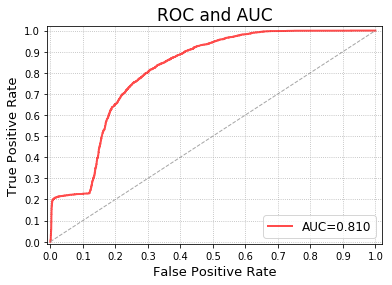

0.8102234042833245


In [37]:
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))

roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')
print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

## 使用随机搜索寻找并设置随机森林算法的超参数

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
        'max_depth': randint(low=1, high=10),
        'min_samples_split': randint(low=1, high=10),
        'min_samples_leaf': randint(low=2, high=10)
    }
rnd_search = RandomizedSearchCV(forest_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('random_forest',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X),y))
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

0.8286339463771327
0.7326578332034295


              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2254
           1       0.20      0.37      0.26       251
           2       0.11      0.33      0.16        45
           3       0.07      0.31      0.12        16

   micro avg       0.73      0.73      0.73      2566
   macro avg       0.33      0.45      0.35      2566
weighted avg       0.84      0.73      0.78      2566



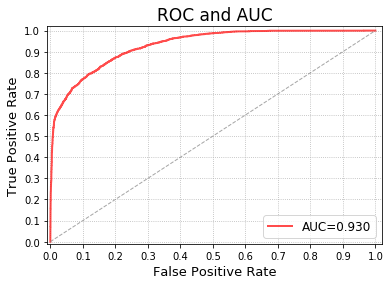

0.930146699236797


In [39]:
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')
print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

## 使用随机搜索寻找并设置SVM算法的超参数

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
 
svc_clf = SVC()
param_distribs = {
        'kernel': ['rbf'],
        'degree': randint(low=1, high=5),
        'gamma': randint(low=1, high=10),
        'shrinking': [True,False],
        #'C': np.random.uniform(0.0001, 1,1000),
        'probability':[True],
        #'class_weight':['balanced'],
    }

rnd_search = RandomizedSearchCV(svc_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('svm',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))
print(accuracy_score(rnd_search.best_estimator_.predict(X),y))

0.877630553390491
0.9999723022379792


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2254
           1       0.00      0.00      0.00       251
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        16

   micro avg       0.88      0.88      0.88      2566
   macro avg       0.22      0.25      0.23      2566
weighted avg       0.77      0.88      0.82      2566



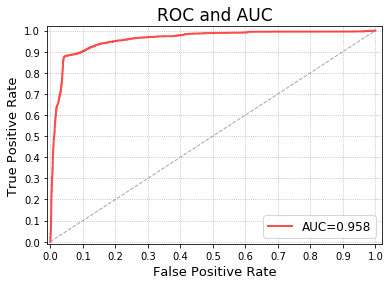

In [45]:
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')
#print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6691348402182385
0.8576335032129404
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      2254
           1       0.17      0.44      0.25       251
           2       0.05      0.20      0.08        45
           3       0.02      0.06      0.03        16

   micro avg       0.67      0.67      0.67      2566
   macro avg       0.29      0.35      0.29      2566
weighted avg       0.84      0.67      0.73      2566



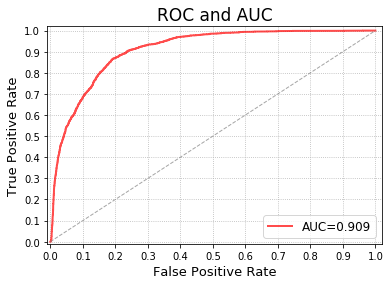

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
 
svc_clf = SVC(kernel = 'rbf',probability=True)

svc_clf.fit(X, y)
print(accuracy_score(svc_clf.predict(X_test),y_test))
print(accuracy_score(svc_clf.predict(X),y))

target_names = ['0', '1', '2','3']
print(classification_report(y_test,svc_clf.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,svc_clf,average = 'micro')
#print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

## 使用随机搜索寻找并设置c4.5算法的超参数

In [48]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
param_distribs = {
        'criterion':['entropy'],
        'max_depth': randint(low=1, high=40),
        'min_samples_split': randint(low=1, high=10),
    }
rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('c4_5',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

0.7813717848791893


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2254
           1       0.18      0.23      0.20       251
           2       0.05      0.07      0.06        45
           3       0.09      0.12      0.11        16

   micro avg       0.78      0.78      0.78      2566
   macro avg       0.30      0.32      0.31      2566
weighted avg       0.81      0.78      0.79      2566



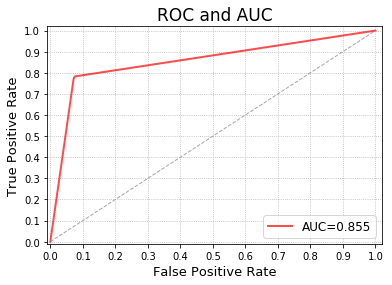

In [49]:
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')
#print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

## 使用随机搜索寻找并设置cart算法的超参数

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
param_distribs = {
        'criterion':['gini'],
        'max_depth': randint(low=1, high=40),
        'min_samples_split': randint(low=1, high=10),
    }
rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('cart',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

0.7782540919719407


              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2254
           1       0.16      0.20      0.18       251
           2       0.06      0.09      0.07        45
           3       0.04      0.06      0.05        16

   micro avg       0.78      0.78      0.78      2566
   macro avg       0.29      0.30      0.29      2566
weighted avg       0.81      0.78      0.79      2566



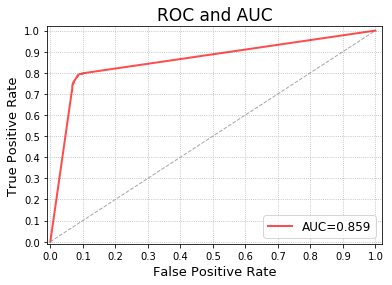

In [51]:
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')
#print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

## 试一下xgBoost

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xg_cls = XGBClassifier()
xg_cls.fit(X, y)
y_pred = xg_cls.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y,xg_cls.predict(X)))

0.8195635229929852
0.839269886993131


In [53]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
param_distribs = {
        'max_depth': randint(low=1, high=10),  
        'learning_rate': np.random.uniform( 0.1 , 1.5 , 100),
        'n_estimators': randint(low=50, high=200),
        'n_jobs':[-1],
        'booster':['gbtree', 'gblinear' ,'dart']
    }
rnd_search = RandomizedSearchCV(xgboost, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X, y)
set_hyper_paras.set_section('xgboost',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

0.8698363211223694


              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2254
           1       0.24      0.04      0.07       251
           2       0.40      0.09      0.15        45
           3       0.17      0.06      0.09        16

   micro avg       0.87      0.87      0.87      2566
   macro avg       0.42      0.29      0.31      2566
weighted avg       0.81      0.87      0.83      2566



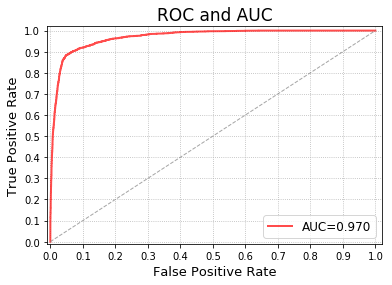

In [54]:
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')
#print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))

## 神经网络

In [4]:
import numpy as np

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

Xtr, Ytr = np.arange(0, 10), np.arange(0, 100).reshape(10, 10)
print(Xtr)
print(Ytr)

Xtr, Ytr = next_batch(5, Xtr, Ytr)
print('\n5 random samples')
print(Xtr)
print(Ytr)

[0 1 2 3 4 5 6 7 8 9]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

5 random samples
[6 0 5 3 8]
[[60 61 62 63 64 65 66 67 68 69]
 [ 0  1  2  3  4  5  6  7  8  9]
 [50 51 52 53 54 55 56 57 58 59]
 [30 31 32 33 34 35 36 37 38 39]
 [80 81 82 83 84 85 86 87 88 89]]


In [5]:
# partial类似js里面的偏函数
from functools import partial
import tensorflow as tf

n_inputs = 40
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 4

batch_norm_momentum = 0.9
learning_rate = 0.01

X_tensor = tf.placeholder(tf.float32, shape=(None, n_inputs), name = 'X')
y_tensor = tf.placeholder(tf.int64, shape=None, name = 'y')
training = tf.placeholder_with_default(False, shape=(), name = 'training')#给Batch norm加一个placeholder

with tf.name_scope("dnn"):
    he_init = tf.contrib.layers.variance_scaling_initializer()
    #对权重的初始化

    my_batch_norm_layer = partial(
        tf.layers.batch_normalization,
        training = training,
        momentum = batch_norm_momentum
    )

    my_dense_layer = partial(
        tf.layers.dense,
        kernel_initializer = he_init
    )

    hidden1 = my_dense_layer(X_tensor ,n_hidden1 ,name = 'hidden1')
    bn1 = tf.nn.elu(my_batch_norm_layer(hidden1))
    hidden2 = my_dense_layer(bn1, n_hidden2, name = 'hidden2')
    bn2 = tf.nn.elu(my_batch_norm_layer(hidden2))
    logists_before_bn = my_dense_layer(bn2, n_outputs, name = 'outputs')
    logists = my_batch_norm_layer(logists_before_bn)

with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_tensor, logits= logists)
    loss = tf.reduce_mean(xentropy, name = 'loss')

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logists, y_tensor, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epoches = 20
batch_size = 100
# 注意：由于我们使用的是 tf.layers.batch_normalization() 而不是 tf.contrib.layers.batch_norm()（如本书所述），
# 所以我们需要明确运行批量规范化所需的额外更新操作（sess.run([ training_op，extra_update_ops], ...)。
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epoches):
        for iteraton in range(len(X)//batch_size):
            X_batch, y_batch = next_batch(batch_size,X,y)
            sess.run([training_op,extra_update_ops],
                     feed_dict={training:True, X_tensor:X_batch, y_tensor:y_batch})
        output = logists.eval(feed_dict= {X_tensor:X_test,
                                          y_tensor:y_test})
        result = [int(np.where(i == i.max())[0]) for i in output]
        print(epoch, 'Test accuracy:', result[:10])
    #save_path = saver.save(sess,"./my_model_final.ckpt")

Instructions for updating:
Colocations handled automatically by placer.
0 Test accuracy: [2, 0, 0, 0, 0, 0, 1, 0, 2, 0]
1 Test accuracy: [2, 0, 0, 0, 0, 0, 1, 0, 2, 0]
2 Test accuracy: [2, 2, 2, 2, 2, 0, 2, 1, 2, 2]
3 Test accuracy: [3, 0, 0, 0, 0, 0, 3, 0, 1, 0]
4 Test accuracy: [0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
5 Test accuracy: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6 Test accuracy: [2, 2, 0, 0, 0, 0, 2, 0, 2, 0]


KeyboardInterrupt: 

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

## 使用随机搜索寻找并设置LR算法的超参数

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg_reg = LogisticRegression()
lg_reg.fit(X,y)
accuracy_score(lg_reg.predict(X_test),y_test)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6438035853468433

In [56]:
from  sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
import numpy as np

param_distribs = {
        'C': np.random.uniform( 0.1 , 1.5 , 50 ),
        'penalty' : ['l1', 'l2'],
        'max_iter': randint(low=10,high=200),
    }
lg_reg = LogisticRegression()
rnd_search = RandomizedSearchCV(lg_reg, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X,y)
set_hyper_paras.set_section('logistic',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.642244738893219


              precision    recall  f1-score   support

           0       0.95      0.68      0.79      2254
           1       0.19      0.38      0.26       251
           2       0.05      0.29      0.08        45
           3       0.05      0.56      0.09        16

   micro avg       0.64      0.64      0.64      2566
   macro avg       0.31      0.48      0.30      2566
weighted avg       0.85      0.64      0.72      2566

0.8450921649234436


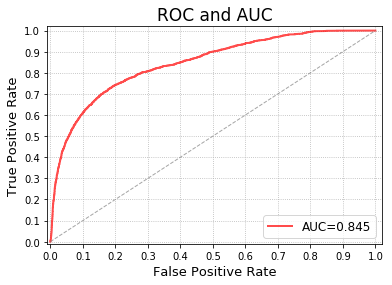

In [57]:
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')

## 使用随机搜索设置gbdt算法的超参数

In [59]:
from  sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import numpy as np

param_distribs = {
        'learning_rate': np.random.uniform( 0.01 , 1.0 , 50 ),
        'n_estimators': randint(low=10,high=200),
        'max_depth': randint(low=1,high=10),
        'min_samples_split': randint(low=2,high=5),
        
    }
gbdt = GradientBoostingClassifier()
rnd_search = RandomizedSearchCV(gbdt, param_distributions=param_distribs,
                                # 迭代10次，5折交叉验证
                                n_iter=10, cv=5, scoring=fbeta_micro, random_state=42,n_jobs=-1)
rnd_search.fit(X,y)
set_hyper_paras.set_section('gbdt',rnd_search.best_params_)
print(accuracy_score(rnd_search.best_estimator_.predict(X_test),y_test))

0.8608729540140296


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2254
           1       0.26      0.11      0.16       251
           2       0.25      0.07      0.11        45
           3       0.12      0.06      0.08        16

   micro avg       0.86      0.86      0.86      2566
   macro avg       0.38      0.30      0.32      2566
weighted avg       0.81      0.86      0.83      2566

0.9651131155929803


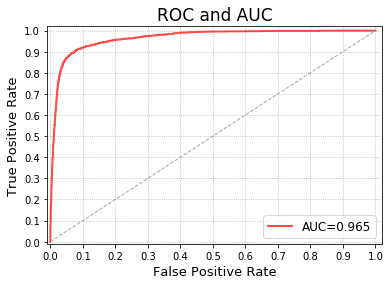

In [60]:
target_names = ['0', '1', '2','3']
print(classification_report(y_test,rnd_search.best_estimator_.predict(X_test), target_names=target_names))
print(get_auc_score(X_test,y_test,rnd_search.best_estimator_,average = 'micro'))
roc_curve(X_test,y_test,rnd_search.best_estimator_,average = 'micro')